In [1]:
import utils
import pandas as pd
import DataGenerator
import DeepSpeech2
import config
import CallBack
from scipy.io import wavfile
from IPython import display
import matplotlib.pyplot as plt

# Data processing

In [2]:
df = pd.read_csv('data/LJSpeech-1.1/metadata.csv', sep='|', header=None)
df.columns = ["filename", "transcript", "col3"]
df = df[["filename", "transcript"]]
split = int(len(df)*0.99)
df_train = df[:split]
df_val = df[split:]

In [5]:
#Create training set
train_generator = DataGenerator.CleanDataGenerator(df_train)
#Create validation set
val_generator = DataGenerator.CleanDataGenerator(df_val)

# Visualization

 Example 1
  - Speech audio 1


  - Transcript: The Commission further recommends that the Secret Service coordinate its planning as closely as possible with all of the Federal agencies from which it receives information.


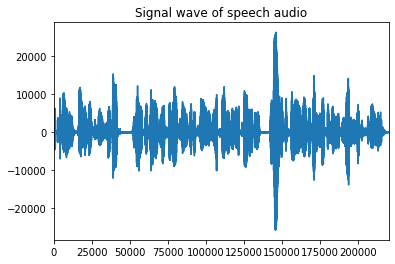

 Example 2
  - Speech audio 2


  - Transcript: Its present manual filing system is obsolete;


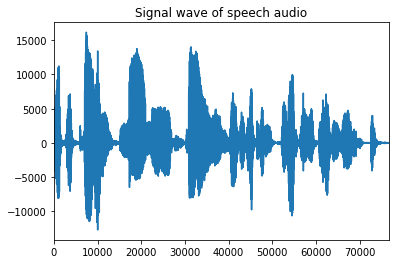

In [6]:
for j, i in enumerate(np.random.randint(0, len(df_val), 2)):
    print(f"\033[1m Example {j+1}")
    
    #Speech sound
    filename = df_val["filename"].iloc[i]
    sf, audio = wavfile.read(f"./data/LJSpeech-1.1/wavs/{filename}.wav")
  
    print(f"\033[0m  - Speech audio {j+1}")
    display.display(display.Audio(np.transpose(audio), rate=16000))
    transcript = df_val["transcript"].iloc[i]
    print(f"\033[0m  - Transcript: {transcript}")
    plt.plot(audio)
    plt.title("Signal wave of speech audio")
    plt.xlim(0, len(audio))
    plt.show()

# Model

In [7]:
model = DeepSpeech2.DeepSpeech2()

# Training

In [ ]:
callback = CallBack.callback(df_val)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./CheckPoint/",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
model.fit(training_gen,
          validation_data =valid_gen,
          epochs = 1,
          callbacks = [callback, checkpoint_callback])

405/405 [==============================] - 1455s 4s/step - loss: 220.4571 - val_loss: 167.5731


WER SCORE: 0.9081632653061225
***************
Transcript: the commission further recommends that the secret service coordinate its planning as closely as possible with all of the federal agencies from which it receives information
prediction: the commion frthereormbnst the sereiserpiscrn i plne is cosly is psbl witl theeraens frwicrfr'
***************
Transcript: since the assassination secret service procedures have been changed to require that a member of prs accompany each advance survey team
prediction: snte ssinion sereseris prters  ben to  tat a meber prs popb tobas ser
***************


# Evaluation

In [ ]:
#Download the weight trained by 30 epochs
#mega = Mega()
#m = mega.login()
#m.download_url("https://mega.nz/file/kwkQFIjL#rzxpfMvtG68ehElDwJ8tsvAzR8JIYUwGa_FofMdyKqk")

In [ ]:
try:
    model.load_weights("DeepSpeech2.h5")
except:
    model.load_weights(".SaveModel/DeepSpeech2.h5")

In [ ]:
#Evaluate the model on the training set
utils.evaluate(model, train_generator)

405/405 [==============================] - 928s 2s/step - loss: 9.4836
 CTC LOSS: 9.48 
 WER: 6% 
**********************************************************************
 Transcript:  on the other hand those plants such as the fungi
 prediction:  on the other hand those plants such as the fungi''
**********************************************************************
 Transcript:  although oswald destroyed the notebook three photographs found among oswald's possessions after the assassination
 prediction:  although oswald destroyed the notebook three photographs found among oswald's possessions after the assassination''
**********************************************************************
 Transcript:  he suffered at stafford in front of the jail
 prediction:  he suffered at stafford in front of the jail''
**********************************************************************
 Transcript:  macintosh's amendment was carried in the commons but the new law did not pass the lords who reenac

In [ ]:
#Evaluate the model on the validation set
utils.evaluate(model, val_generator)

4/4 [==============================] - 9s 2s/step - loss: 39.1392
 CTC LOSS: 39.14 
 WER: 14% 
**********************************************************************
 Transcript:  the secret service should utilize the personnel of other federal law enforcement offices
 prediction:  the secret service should utilize the personnel of other federal law enforcement offices'
**********************************************************************
 Transcript:  it may eventually be desirable to codify the practice in an executive order
 prediction:  it may eventually be desirable to coatify the practice in an executive order'
**********************************************************************
 Transcript:  in case of unexpected need and  additional agents are recommended to provide the vice president full protection
 prediction:  in case of unexpected need and twentyfive additional agents are recommended to provide the vice president full protection'
****************************************